<a href="https://colab.research.google.com/github/juno2856/deeplearning/blob/master/Class_14_20220419.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
!mkdir data
from google.colab import files
file_uploaded = files.upload()

Saving wine.csv to wine.csv


In [8]:
df_pre = pd.read_csv('/content/wine.csv', header = None)
df_pre.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [9]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [10]:
#정보의 50%만 불러옴
df = df_pre.sample(frac = 0.5)

In [11]:
df.shape

(3248, 13)

In [12]:
dataset = df.values
#dataset

X = dataset[:, :-1]
Y = dataset[:, -1].astype(np.int16)
print(X.dtype)
print(Y.dtype)
Y[:10]

float64
int16


array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int16)

In [20]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 12, activation = 'relu'))
model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

In [23]:
history =model.fit(X,Y, epochs = 200, batch_size = 100)

Epoch 1/200
33/33 [==============================] - 1s 3ms/step - loss: 0.4058 - accuracy: 0.7669
Epoch 2/200
33/33 [==============================] - 0s 5ms/step - loss: 0.2872 - accuracy: 0.8879
Epoch 3/200
33/33 [==============================] - 0s 6ms/step - loss: 0.2216 - accuracy: 0.9338
Epoch 4/200
33/33 [==============================] - 0s 7ms/step - loss: 0.2005 - accuracy: 0.9350
Epoch 5/200
33/33 [==============================] - 0s 10ms/step - loss: 0.1900 - accuracy: 0.9375
Epoch 6/200
33/33 [==============================] - 0s 7ms/step - loss: 0.1891 - accuracy: 0.9357
Epoch 7/200
33/33 [==============================] - 0s 6ms/step - loss: 0.1850 - accuracy: 0.9390
Epoch 8/200
33/33 [==============================] - 0s 4ms/step - loss: 0.1832 - accuracy: 0.9397
Epoch 9/200
33/33 [==============================] - 0s 5ms/step - loss: 0.1812 - accuracy: 0.9424
Epoch 10/200
33/33 [==============================] - 0s 4ms/step - loss: 0.1781 - accuracy: 0.9415
Epoch 11

In [16]:
model.evaluate(X,Y)

102/102 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9880


[0.036355964839458466, 0.9879925847053528]

In [17]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [24]:
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath = modelpath,
                                             monitor = 'val_loss',
                                             verbose = 1,
                                             save_best_only = True)

history = model.fit(X,Y, validation_split=0.2, epochs = 200, batch_size = 200,
          verbose = 1, callbacks = [checkpoint])

Epoch 1/200
 1/13 [=>............................] - ETA: 0s - loss: 0.1100 - accuracy: 0.9750
Epoch 1: val_loss improved from inf to 0.01852, saving model to ./model/01-0.0185.hdf5
13/13 [==============================] - 0s 22ms/step - loss: 0.0426 - accuracy: 0.9865 - val_loss: 0.0185 - val_accuracy: 0.9938
Epoch 2/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0537 - accuracy: 0.9800
Epoch 2: val_loss did not improve from 0.01852
13/13 [==============================] - 0s 5ms/step - loss: 0.0400 - accuracy: 0.9869 - val_loss: 0.0194 - val_accuracy: 0.9954
Epoch 3/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0620 - accuracy: 0.9750
Epoch 3: val_loss did not improve from 0.01852
13/13 [==============================] - 0s 6ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.0216 - val_accuracy: 0.9969
Epoch 4/200
 1/13 [=>............................] - ETA: 0s - loss: 0.0488 - accuracy: 0.9950
Epoch 4: val_loss did not improve from 0.01852
13/1

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

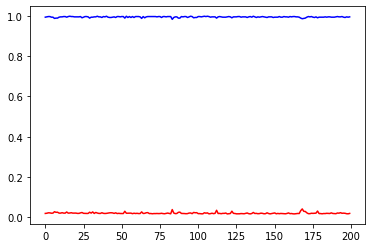

In [30]:
y_loss = history.history['val_loss']
y_acc = history.history['val_accuracy']
#print(y_loss)
#print(y_acc)

plt.plot(y_loss, c= 'r')
plt.plot(y_acc, c ='b')
plt.show()

In [35]:
##
df = df_pre

X = df.values[:, :-1]
Y = df.values[:, -1].astype(np.int16)
print(X.dtype)
print(Y.dtype)

float64
int16


In [37]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 12, activation = 'relu'))
model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                390       
                                                                 
 dense_13 (Dense)            (None, 12)                372       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

In [41]:
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkerpoint = keras.callbacks.ModelCheckpoint(filepath = modelpath,
                                               monitor = 'val_loss',
                                               verbos = 1,
                                               save_best_only = True)

early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 3)

history = model.fit(X,Y, validation_split = 0.3, epochs = 1000, 
                    batch_size = 500, verbose = 1,
                    callbacks = [checkerpoint, early_stopping])

Epoch 1/1000
10/10 [==============================] - 2s 47ms/step - loss: 2.9652 - accuracy: 0.3517 - val_loss: 1.3089 - val_accuracy: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.8995 - accuracy: 0.3517 - val_loss: 0.9066 - val_accuracy: 0.0000e+00
Epoch 3/1000
10/10 [==============================] - 0s 26ms/step - loss: 0.7567 - accuracy: 0.3517 - val_loss: 0.7918 - val_accuracy: 0.0000e+00
Epoch 4/1000
10/10 [==============================] - 0s 40ms/step - loss: 0.7024 - accuracy: 0.3558 - val_loss: 0.7204 - val_accuracy: 0.1190
Epoch 5/1000
10/10 [==============================] - 0s 29ms/step - loss: 0.6676 - accuracy: 0.6459 - val_loss: 0.6883 - val_accuracy: 0.8462
Epoch 6/1000
10/10 [==============================] - 0s 39ms/step - loss: 0.6525 - accuracy: 0.8489 - val_loss: 0.6824 - val_accuracy: 0.9087
Epoch 7/1000
10/10 [==============================] - 0s 16ms/step - loss: 0.6430 - accuracy: 0.8454 - val_loss: 0.6813 - val_accu

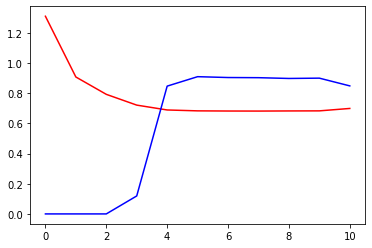

In [45]:
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(val_loss, c ='r')
plt.plot(val_acc, c= 'b')
plt.show()

In [73]:
### 책 188~
np.random.seed(3)
tf.random.set_seed(3)

In [74]:
df_pre = pd.read_csv('/content/wine.csv', header = None)
df = df_pre.sample(frac =1)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,9.0,0.400,0.43,2.4,0.068,29.0,46.0,0.99430,3.20,0.60,12.20,6,1
1667,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.70,8,0
3321,7.5,0.400,1.00,19.5,0.041,33.0,148.0,0.99770,3.24,0.38,12.00,6,0
1688,7.1,0.440,0.62,11.8,0.044,52.0,152.0,0.99750,3.12,0.46,8.70,6,0


In [75]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [80]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 12, activation = 'relu'))
model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 30)                390       
                                                                 
 dense_29 (Dense)            (None, 12)                372       
                                                                 
 dense_30 (Dense)            (None, 8)                 104       
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [78]:
from keras.callbacks  import ModelCheckpoint

In [68]:
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, 
                               monitor = 'val_loss',
                               verbose =1,
                               save_best_only = True)

model.fit(X,Y, validation_split = 0.2, epochs = 200, batch_size = 200, verbose = 0, callbacks = [checkpointer])


Epoch 1: val_loss improved from inf to 0.37407, saving model to ./model/01-0.3741.hdf5

Epoch 2: val_loss improved from 0.37407 to 0.31246, saving model to ./model/02-0.3125.hdf5

Epoch 3: val_loss improved from 0.31246 to 0.23598, saving model to ./model/03-0.2360.hdf5

Epoch 4: val_loss improved from 0.23598 to 0.21389, saving model to ./model/04-0.2139.hdf5

Epoch 5: val_loss improved from 0.21389 to 0.20620, saving model to ./model/05-0.2062.hdf5

Epoch 6: val_loss improved from 0.20620 to 0.20144, saving model to ./model/06-0.2014.hdf5

Epoch 7: val_loss improved from 0.20144 to 0.19685, saving model to ./model/07-0.1968.hdf5

Epoch 8: val_loss improved from 0.19685 to 0.19130, saving model to ./model/08-0.1913.hdf5

Epoch 9: val_loss improved from 0.19130 to 0.18650, saving model to ./model/09-0.1865.hdf5

Epoch 10: val_loss improved from 0.18650 to 0.18224, saving model to ./model/10-0.1822.hdf5

Epoch 11: val_loss improved from 0.18224 to 0.17814, saving model to ./model/11-0.

In [85]:
import shutil
shutil.rmtree('./model')

In [86]:
df = df_pre.sample(frac=0.15)
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:,12]



#histroy = model.fit(X,Y, validation_split = 0.33, epochs = 3500, batch_size = 500)

In [87]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 12, activation = 'relu'))
model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 30)                390       
                                                                 
 dense_33 (Dense)            (None, 12)                372       
                                                                 
 dense_34 (Dense)            (None, 8)                 104       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [89]:
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, 
                               monitor = 'val_loss',
                               verbose =1,
                               save_best_only = True)

histroy = model.fit(X,Y, validation_split = 0.33, epochs = 3500, batch_size = 500)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2/2 [==============================] - 0s 35ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0953 - val_accuracy: 0.9752
Epoch 1002/3500
2/2 [==============================] - 0s 38ms/step - loss: 0.0323 - accuracy: 0.9893 - val_loss: 0.0935 - val_accuracy: 0.9783
Epoch 1003/3500
2/2 [==============================] - 0s 40ms/step - loss: 0.0365 - accuracy: 0.9862 - val_loss: 0.0921 - val_accuracy: 0.9752
Epoch 1004/3500
2/2 [==============================] - 0s 33ms/step - loss: 0.0314 - accuracy: 0.9954 - val_loss: 0.1054 - val_accuracy: 0.9720
Epoch 1005/3500
2/2 [==============================] - 0s 33ms/step - loss: 0.0390 - accuracy: 0.9847 - val_loss: 0.0932 - val_accuracy: 0.9720
Epoch 1006/3500
2/2 [==============================] - 0s 34ms/step - loss: 0.0311 - accuracy: 0.9908 - val_loss: 0.0992 - val_accuracy: 0.9752
Epoch 1007/3500
2/2 [==============================] - 0s 35ms/step - loss: 0.0342 - accuracy: 0.9877 - val_loss: 0.

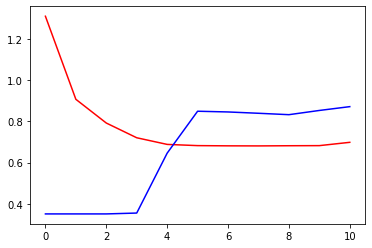

In [92]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, '-', c= 'red', markersize = 3)
plt.plot(x_len, y_acc, '-', c= 'b', markersize = 3)

plt.show()

In [94]:
from keras.callbacks import EarlyStopping

In [95]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience =100)

In [96]:
model.fit(X,Y, validation_split = 0.33, epochs = 2000, batch_size = 500, callbacks = [early_stopping_callback])

Epoch 1/2000
2/2 [==============================] - 0s 126ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1096 - val_accuracy: 0.9814
Epoch 2/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.0062 - accuracy: 0.9969 - val_loss: 0.1046 - val_accuracy: 0.9845
Epoch 3/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0937 - val_accuracy: 0.9907
Epoch 4/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0918 - val_accuracy: 0.9907
Epoch 5/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0923 - val_accuracy: 0.9907
Epoch 6/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0940 - val_accuracy: 0.9907
Epoch 7/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9907
Epoch 8/2000